In [7]:
import pandas as pd

df = pd.read_csv('/content/sample_data/insurance_cleaned.csv')
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,16884.92400,0,1,0,0,1
1,-1.509965,0.509621,-0.078767,1725.55230,1,0,0,1,0
2,-0.797954,0.383307,1.580926,4449.46200,1,0,0,1,0
3,-0.441948,-1.305531,-0.908614,21984.47061,1,0,1,0,0
4,-0.513149,-0.292556,-0.908614,3866.85520,1,0,1,0,0


In [8]:
!pip install -q tensorflow

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load data
df = pd.read_csv('/content/sample_data/insurance_cleaned.csv')
df.head()

# Features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)

# Evaluate the model on the test data
y_pred = model.predict(X_test)

# Calculate and print performance metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 309057152.0000 - mae: 12971.1211 - val_loss: 355181728.0000 - val_mae: 13987.1055
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 312627104.0000 - mae: 13174.7959 - val_loss: 355119552.0000 - val_mae: 13985.1377
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 308637984.0000 - mae: 12935.9727 - val_loss: 354994528.0000 - val_mae: 13981.3457
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 318019808.0000 - mae: 13114.1846 - val_loss: 354749728.0000 - val_mae: 13974.2812
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 303550848.0000 - mae: 12860.4180 - val_loss: 354322144.0000 - val_mae: 13962.3154
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 301706656.0000 - mae: 12647.6289 - val_loss: 353643008.0000 - val_mae: 13943.9365
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 319916672.0000 - mae: 13317.6777 - val_loss: 352620608.0000 - val_mae: 13917.1240
Epoch 8/100
27/27 ━━━━━━

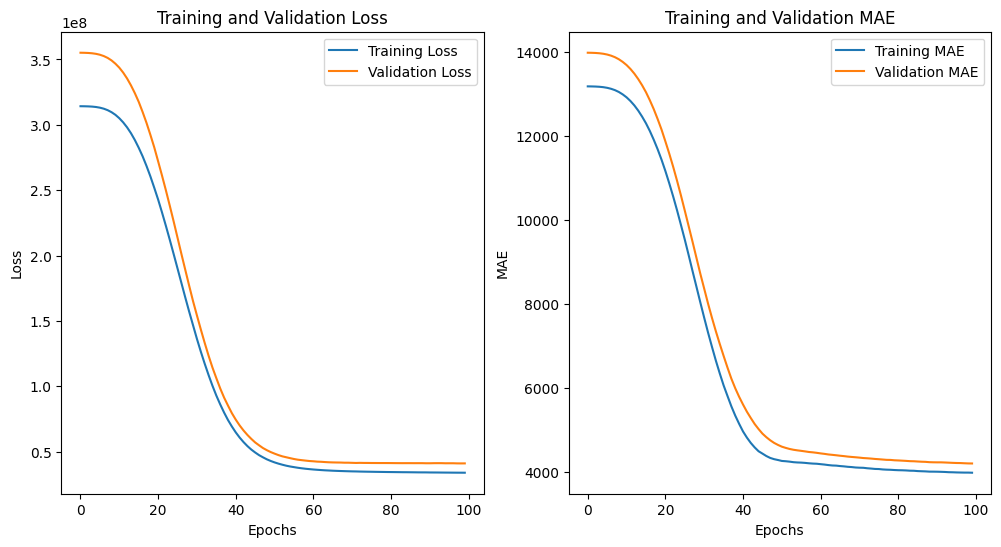

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [21]:
best_epoch = np.argmin(history.history['val_loss'])
print(f'Best Epoch: {best_epoch+1}')

Best Epoch: 99


In [22]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Absolute Error: 4017.9581031358443
Mean Squared Error: 31940702.70983503
R² Score: 0.7942611034375663


In [24]:
model.save('insurance_model.keras')

In [25]:
y_pred_test = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
print(f"Test Mean Absolute Error: {test_mae}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Test Mean Absolute Error: 4017.9581031358443
